C:\Users\ky090\OneDrive - The University of Texas at Austin\001_Market\004_CFTC
C:\Users\ky090\OneDrive - The University of Texas at Austin\001_Market\100_Output


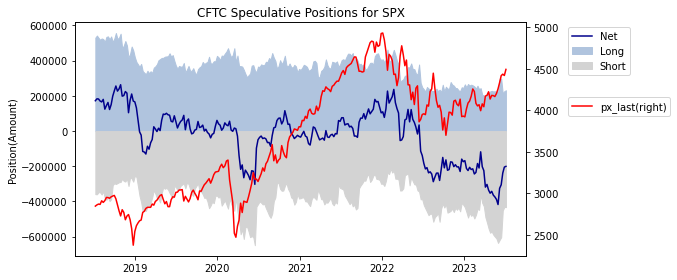

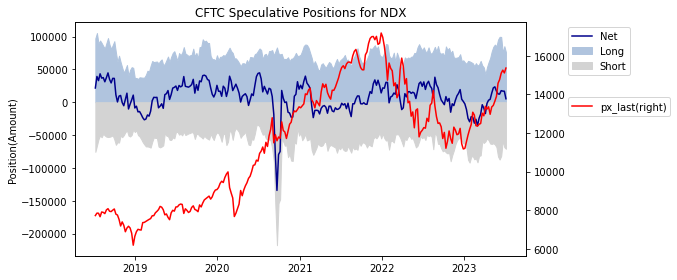

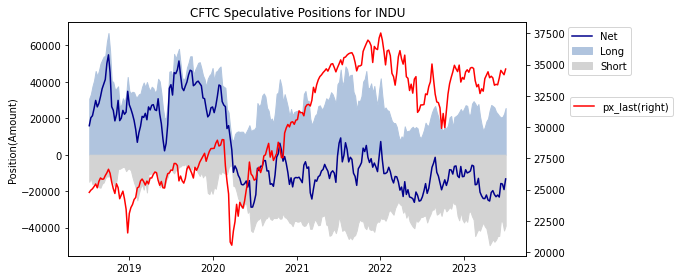

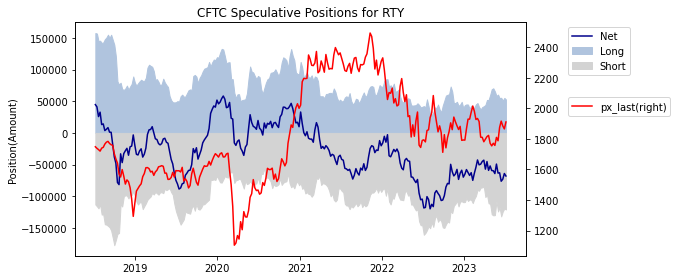

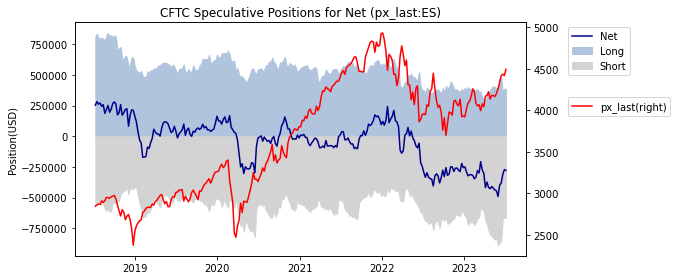

<Figure size 432x288 with 0 Axes>

In [1]:
import os
path = r"C:/Users/ky090/OneDrive - The University of Texas at Austin/001_Market/004_CFTC"
path = path.replace("\\", "/")
os.chdir(path)
print(os.getcwd())

%matplotlib inline
%run CFTC

<br>

## The following is the same information as in CFTC.py

In [2]:
import os
import blpapi
from xbbg import blp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import date
# https://pythondatascience.plavox.info/wp-content/uploads/2016/06/colorpalette.png

In [3]:
List = [
    ['ES', 'Index', 'IMM0E', 'IMMTE'],
    ['NQ', 'Index', 'IMM3N', 'IMMPN'],
    ['DM', 'Index', 'CBT1D', 'CBTOD'],
    ['RTY', 'Index', 'CFF6T', 'CFC6T'],
    ['HWA', 'Index', 'CF30C', 'CC30C'],
    ['HWB', 'Index', 'CF30D', 'CC30D'],
    ['HWI', 'Index', 'CF30E', 'CC30E'],
    ['HWR', 'Index', 'CF30F', 'CC30F']
]

List = pd.DataFrame(List, columns=["Symbol", "YK", "Fut", "Fut&Option"])  # YK=YellowKey
S = List["Symbol"]
T = S + "A " + List["YK"]
BDP = blp.bdp(tickers=T.tolist(), flds=["name", "undl_spot_ticker", "exch_code", "contract_value"]).loc[T, :]

List[["Name", "Undl", "Exch", "Contract"]] = np.array(BDP)
List["MicroMini"] = "-"
List["Adj"] = "-"
for i in range(len(List)):
    tmp = List.loc[List["Undl"]==List.loc[i,"Undl"],"Symbol"].values[1]
    if tmp != List.loc[i,"Symbol"]:
        List.loc[i,"MicroMini"] = tmp
        List.loc[i,"Adj"] = 0.1
List

,Symbol,YK,Fut,Fut&Option,Name,Undl,Exch,Contract,MicroMini,Adj
0,ES,Index,IMM0E,IMMTE,S&P500 EMINI FUT Sep23,SPX,CME,221700.0,HWA,0.1
1,NQ,Index,IMM3N,IMMPN,NASDAQ 100 E-MINI Sep23,NDX,CME,303635.0,HWB,0.1
2,DM,Index,CBT1D,CBTOD,DJIA MINI e-CBOT Sep23,INDU,CBT,169685.0,HWI,0.1
3,RTY,Index,CFF6T,CFC6T,E-Mini Russ 2000 Sep23,RTY,CME,93900.0,HWR,0.1
4,HWA,Index,CF30C,CC30C,SP500 MIC EMIN FUTSep23,SPX,CME,22170.0,-,-
5,HWB,Index,CF30D,CC30D,NASD100 MICRO EMINSep23,NDX,CME,30363.5,-,-
6,HWI,Index,CF30E,CC30E,DJIA MICR MIN CBOTSep23,INDU,CBT,16968.5,-,-
7,HWR,Index,CF30F,CC30F,MICRO EMIN RUS2000Sep23,RTY,CME,9390.0,-,-


In [4]:
d_from = (pd.Timestamp.today()-pd.DateOffset(years=5)).strftime("%Y%m%d")
d_to = pd.Timestamp.today().strftime("%Y%m%d")

P = ["L","S","N"] 
tmp = List["Fut"]
T = [i + "NC" + j + " Index" for i in tmp for j in P]

for i in range(len(List)):
    tmp = List.loc[List["Undl"]==List.loc[i,"Undl"],"Symbol"].values[1]

BDH = blp.bdh(tickers=T, flds="px_last", start_date=d_from,end_date=d_to, Per="W", Days="W").reset_index()
BDH = BDH[["index"]+T]
BDH.head()

,index,IMM0ENCL Index,IMM0ENCS Index,IMM0ENCN Index,IMM3NNCL Index,IMM3NNCS Index,IMM3NNCN Index,CBT1DNCL Index,CBT1DNCS Index,CBT1DNCN Index,...,CF30CNCN Index,CF30DNCL Index,CF30DNCS Index,CF30DNCN Index,CF30ENCL Index,CF30ENCS Index,CF30ENCN Index,CF30FNCL Index,CF30FNCS Index,CF30FNCN Index
,,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last,...,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last
0,2018-07-10,530848.0,358871.0,171977.0,97219.0,75615.0,21604.0,30745.0,14835.0,15910.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-17,542517.0,359545.0,182972.0,105323.0,66127.0,39196.0,33203.0,12876.0,20327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-24,529609.0,347748.0,181861.0,89117.0,56244.0,32873.0,37542.0,16164.0,21378.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-31,518509.0,348207.0,170302.0,93867.0,50643.0,43224.0,40767.0,15400.0,25367.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-07,525992.0,360753.0,165239.0,90075.0,53402.0,36673.0,45927.0,16151.0,29776.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
T = [f"{List.loc[i, 'Symbol']}1 {List.loc[i, 'YK']}" for i in range(len(List))]
BDH2 = blp.bdh(tickers=T+["USDJPY Curncy"], flds="px_last", start_date=d_from,end_date=d_to, Days="W",Fill="P").reset_index()
BDH2 = BDH2[["index"]+T]

BDH2.columns = ["Date"] + [ i + "_last" for i in S]
BDH2.head()

,Date,ES_last,NQ_last,DM_last,RTY_last,HWA_last,HWB_last,HWI_last,HWR_last
0,2018-07-09,2835.87,7716.69,24633.05,1759.25,NaN,NaN,NaN,NaN
1,2018-07-10,2845.28,7718.01,24785.17,1748.76,NaN,NaN,NaN,NaN
2,2018-07-11,2822.13,7667.54,24548.53,1734.87,NaN,NaN,NaN,NaN
3,2018-07-12,2847.06,7803.90,24752.36,1740.63,NaN,NaN,NaN,NaN
4,2018-07-13,2851.89,7814.73,24861.74,1739.91,NaN,NaN,NaN,NaN


In [6]:
df = BDH.copy()
df.columns = ['Date'] + [f'{i}_{j}' for i in List['Symbol'] for j in P]
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: -x if x.name[-1] == 'S' else x)
df = df.merge(BDH2[['Date'] + [ i + "_last" for i in S]])
df.fillna(0, inplace=True)
df.head()

,Date,ES_L,ES_S,ES_N,NQ_L,NQ_S,NQ_N,DM_L,DM_S,DM_N,...,HWR_S,HWR_N,ES_last,NQ_last,DM_last,RTY_last,HWA_last,HWB_last,HWI_last,HWR_last
0,2018-07-10,530848.0,-358871.0,171977.0,97219.0,-75615.0,21604.0,30745.0,-14835.0,15910.0,...,0.0,0.0,2845.28,7718.01,24785.17,1748.76,0.0,0.0,0.0,0.0
1,2018-07-17,542517.0,-359545.0,182972.0,105323.0,-66127.0,39196.0,33203.0,-12876.0,20327.0,...,0.0,0.0,2860.03,7845.12,24963.16,1738.47,0.0,0.0,0.0,0.0
2,2018-07-24,529609.0,-347748.0,181861.0,89117.0,-56244.0,32873.0,37542.0,-16164.0,21378.0,...,0.0,0.0,2869.95,7839.31,25070.54,1730.24,0.0,0.0,0.0,0.0
3,2018-07-31,518509.0,-348207.0,170302.0,93867.0,-50643.0,43224.0,40767.0,-15400.0,25367.0,...,0.0,0.0,2865.88,7658.03,25250.51,1720.16,0.0,0.0,0.0,0.0
4,2018-08-07,525992.0,-360753.0,165239.0,90075.0,-53402.0,36673.0,45927.0,-16151.0,29776.0,...,0.0,0.0,2909.37,7903.79,25454.35,1739.81,0.0,0.0,0.0,0.0


In [7]:
def CFTC(s):
    fig, ax1 = plt.subplots(figsize=(10,4))
    Date = df["Date"]
    
    MM = List.loc[List["Symbol"]==s,"MicroMini"].values[0]
    
    if MM == "-":
        SL, SS, SN = [df[s+"_"+p] for p in P]
    else:
        Adj = List.loc[List["Symbol"]==s,"Adj"].values[0]
        SL, SS, SN = [df[s+"_"+p] + df[MM+"_"+p]*Adj for p in P]

    ax1.stackplot(Date, SL, labels=['Long'], color='lightsteelblue')
    ax1.stackplot(Date, SS, labels=['Short'], color="lightgrey")
    ax1.plot(Date, SN, label='Net', color="darkblue")
    ax2 = ax1.twinx()  
    ax2.plot(Date, df[s+"_last"], label='px_last(right)', color="red")  # Use the second y-axis for the fourth plot

    tmp = list(List.loc[List["Symbol"]==s,"Undl"])[0]
    plt.title("CFTC Speculative Positions for " + tmp)
    ax1.set_ylabel("Position(Amount)")
    
    ax1.legend(loc='upper left', bbox_to_anchor=(1.08, 1))
    ax2.legend(loc='upper right', bbox_to_anchor=(1.33, 0.7))
    fig.tight_layout()
    plt.show()
    
    return fig
    
def CFTC_Net():
    fig, ax1 = plt.subplots(figsize=(10,4))
    Date = df["Date"]
    
    P = ['L', 'S', 'N']
    pos = {key: [0] * len(df) for key in P}

    for s in S[:4]:
        MM = List.loc[List["Symbol"]==s,"MicroMini"].values[0]
        Adj = List.loc[List["Symbol"]==s,"Adj"].values[0]
        for p in P:
            pos[p] += df[s+"_"+p] + df[MM+"_"+p]*Adj

    color_map = {'L': 'lightsteelblue', 'S': 'lightgrey', 'N': 'darkblue'}
    labels_map = {'L': 'Long', 'S': 'Short', 'N': 'Net'}

    for p in P:
        if p == 'N':
            ax1.plot(Date, pos[p], label=labels_map[p], color=color_map[p])
        else:
            ax1.stackplot(Date, pos[p], labels=[labels_map[p]], color=color_map[p])

    ax2 = ax1.twinx()
    ax2.plot(Date, df["ES_last"], label='px_last(right)', color="red")

    plt.title("CFTC Speculative Positions for Net (px_last:ES)")
    ax1.set_ylabel("Position(USD)")

    ax1.legend(loc='upper left', bbox_to_anchor=(1.08, 1))
    ax2.legend(loc='upper right', bbox_to_anchor=(1.33, 0.7))
    fig.tight_layout()
    plt.show()
    
    return fig

C:\Users\ky090\OneDrive - The University of Texas at Austin\001_Market\100_Output


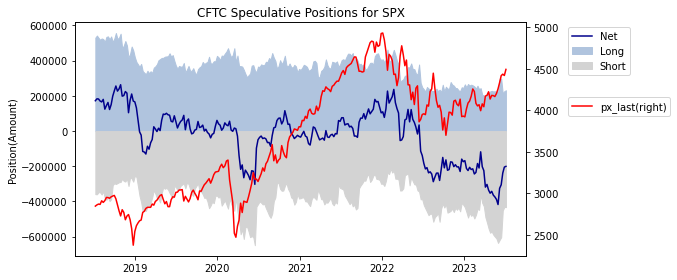

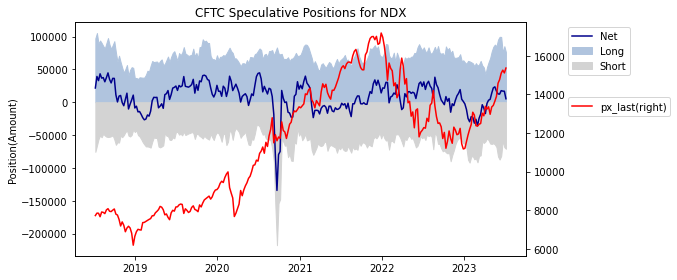

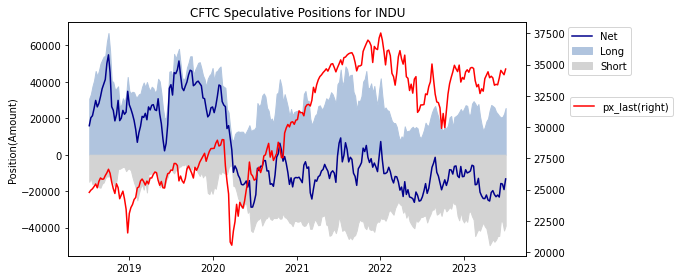

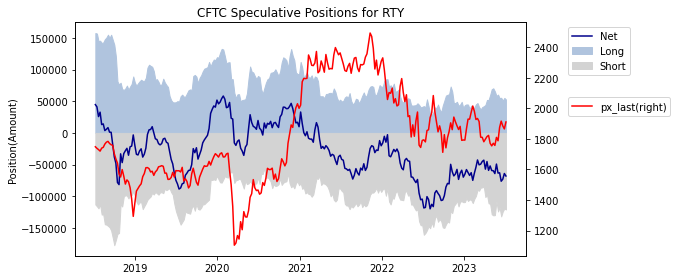

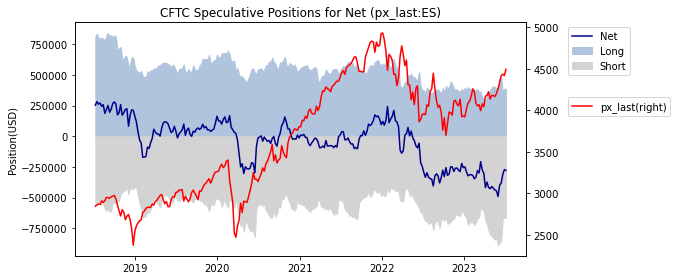

In [8]:
path = r"C:\Users\ky090\OneDrive - The University of Texas at Austin\001_Market\100_Output"
path = path.replace("\\", "/")
os.chdir(path)
print(os.getcwd())

with PdfPages(f"CFTC_{date.today().strftime('%Y%m%d')}.pdf") as pdf:
    for s in S[:4]:
        fig = CFTC(s)
        pdf.savefig(fig)
        plt.close(fig)

    fig = CFTC_Net()
    pdf.savefig(fig)
    plt.close(fig)